# Comparing Two Means with Unpaired t Test

## Introduction

In hypothesis testing, the unpaired t-test is a valuable tool for determining if two separate groups have truly different average values. Whether we're investigating the impact of a new drug on blood pressure or comparing crop yields from two different fertilizers, the unpaired t-test helps us draw statistically sound conclusions from our data.

We use the unpaired t-test specifically when we have **two independent groups or samples**. These groups are not paired or matched in any way. For instance, we might have one group of patients receiving a new medication and another group receiving a placebo. The test assesses whether any observed difference in the means of these two groups is statistically significant or simply due to chance. 

Before applying the unpaired t-test, it's important to make sure our data meets certain assumptions:

* **Independence**: the observations within each group should be independent of each other. 
* **Normality**: the data within each group should ideally follow a normal distribution. However, the t-test is reasonably robust to moderate deviations from normality, especially with larger sample sizes.
* **Equal variances**: the variances of the two groups should be approximately equal. If the variances differ significantly, alternative versions of the t-test (such as Welch's t-test) can be used.

The unpaired t-test works by calculating a test statistic that quantifies the *difference between the means* of the two groups relative to the variability within each group. This test statistic follows a [known distribution (the **t-distribution**)](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#the-t-distribution) under the null hypothesis of no difference between the group means. By comparing the calculated test statistic to the expected distribution, we obtain a P value. If the P value falls below our chosen significance level (alpha), we reject the null hypothesis and conclude that a statistically significant difference exists between the two group means.

In the following sections, we'll delve deeper into the mathematical foundations of the unpaired t-test, explore its practical applications, and provide the knowledge needed to confidently apply this test in our own analyses.

## Preparing data for hypothesis testing

### Descriptive statistics and visualization

In this section, we will introduce the importance of descriptive statistics and visualization in understanding the characteristics of the two samples being compared. We will emphasize how these techniques provide valuable insights into the central tendency, spread, and distribution of the data, which are crucial for interpreting the results of the unpaired t-test.

[Frazier and colleagues](https://pubmed.ncbi.nlm.nih.gov/16736152/) investigated the impact of norepinephrine on bladder muscle relaxation in rats. Their study specifically examined the maximum relaxation ($\%\text{E}_\text{max}$) achievable with high doses of this neurotransmitter, comparing the responses of old ('old') and young ('yng') rats.

In [1]:
import numpy as np

# We use the data from Table 30.1 of the book Intuitive Biostatistics
old = np.array([20.8, 2.8, 50, 33.3, 29.4, 38.9, 29.4, 52.6, 14.3])  # old rats
yng = np.array([45.5, 55, 60.7, 61.5, 61.1, 65.5, 42.9, 37.5])       # young rats

In [2]:
import scipy.stats as stats

# Descriptive statistics
old_stats = stats.describe(old)
yng_stats = stats.describe(yng)

print("Descriptive statistics for 'old':\n", old_stats, '\n')
print("Descriptive statistics for 'young':\n", yng_stats)

Descriptive statistics for 'old':
 DescribeResult(nobs=9, minmax=(2.8, 52.6), mean=30.16666666666667, variance=259.0375, skewness=-0.17569385392311104, kurtosis=-0.8080848898945967) 

Descriptive statistics for 'young':
 DescribeResult(nobs=8, minmax=(37.5, 65.5), mean=53.7125, variance=107.4069642857143, skewness=-0.4421628669270582, kurtosis=-1.3632352105713499)


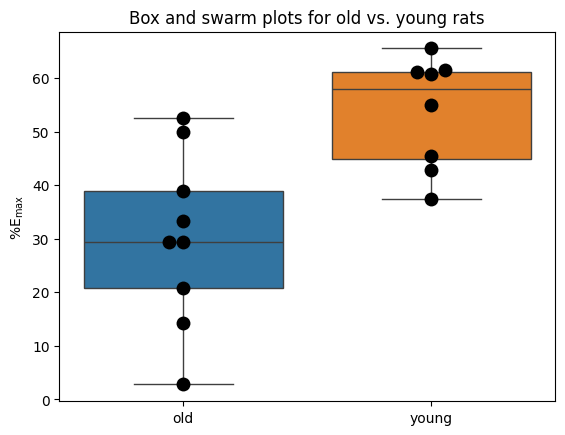

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box and swarm plots
sns.boxplot(data=[old, yng])
sns.swarmplot(data=[old, yng], color='black', size=10)
plt.ylabel(r"$\%\text{E}_\text{max}$")
plt.xticks([0, 1], ['old', 'young'])
plt.title("Box and swarm plots for old vs. young rats");

### Assessing assumptions

Before proceeding with any hypothesis test, it's crucial to verify that our data adheres to the underlying assumptions of the chosen statistical method. This subsection emphasizes the importance of checking for normality and homogeneity of variance, two common assumptions in many parametric tests, including the unpaired t-test. We'll briefly discuss the methods used to assess these assumptions, such as normality tests and tests for equal variances, and outline the potential consequences of violating these assumptions. Additionally, we'll highlight the available remedies or alternative approaches when assumptions are not met, ensuring the robustness and validity of our statistical inferences.

#### Normality testing

One of the fundamental assumptions of the unpaired t-test is that the data within each group is approximately normally distributed. To assess this assumption, we employ normality tests such as the D'Agostino-Pearson omnibus K² and Shapiro-Wilk tests, or visual inspections of histograms or Q-Q plots, [as discussed in greater details in a previous chapter about normality test](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html). These tests help us gauge whether the observed data aligns with the expected characteristics of a normal distribution.

In [4]:
# Normality tests
# D'Agostino-Pearson K² test
k2_old, pval_k2_old = stats.normaltest(old)
k2_yng, pval_k2_yng = stats.normaltest(yng)

print(
    'old',
    f"D'Agostino-Pearson omnibus: K2={k2_old:.2f}, P value={pval_k2_old:.3f}",
    sep='\t')
print(
    'young',
    f"D'Agostino-Pearson omnibus: K2={k2_yng:.2f}, P value={pval_k2_yng:.3f}",
    sep='\t')

# Shapiro-Wilk
shapiro_old, pval_shapiro_old = stats.shapiro(old)
shapiro_yng, pval_shapiro_yng = stats.shapiro(yng)

print(
    'old',
    f"Shapiro-Wilk's normality test P value={pval_shapiro_old:.3f}",
    sep='\t')
print(
    'young',
    f"Shapiro-Wilk's normality test P value={pval_shapiro_yng:.3f}",
    sep='\t')

# Interpret the results
alpha = 0.05  # Set the desired significance level

if (pval_k2_old > alpha and pval_k2_yng > alpha) or (pval_shapiro_old > alpha and pval_shapiro_yng > alpha):
    print("\nBoth groups' data are not inconsistent with a normal distribution \
(failed to reject null hypothesis of normality)")
else:
    print("\nAt least one group's data is not consistent with a normal distribution")

old	D'Agostino-Pearson omnibus: K2=0.11, P value=0.947
young	D'Agostino-Pearson omnibus: K2=1.75, P value=0.418
old	Shapiro-Wilk's normality test P value=0.900
young	Shapiro-Wilk's normality test P value=0.238

Both groups' data are not inconsistent with a normal distribution (failed to reject null hypothesis of normality)


c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


[As discussed previsouly](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#normality-tests-using-pingouin), `pingouin`'s normality function actually performs both the Shapiro-Wilk test and the D'Agostino-Pearson test.

In [5]:
import pingouin as pg

# Function to perform tests and print results (no changes needed here)

def normality_tests(data, sample_type):
    s = f"{'Test':<20} {'W':<6} {'P value':<8} {'normal'}"
    print(f"Normality tests for {sample_type}".center(len(s), "-"))
    print(s)

    # D'Agostino-Pearson Test
    dagostino_results = pg.normality(data, method='normaltest')
    print(f"{'D\'Agostino-Pearson':<20} {dagostino_results['W'][0]:<6.2f} \
{dagostino_results['pval'][0]:<8.3f} {dagostino_results['normal'][0]}")

    # Shapiro-Wilk Test
    shapiro_results = pg.normality(
        data,
        method='shapiro')
    print(f"{'Shapiro-Wilk':<20} {shapiro_results['W'][0]:<6.2f} \
{shapiro_results['pval'][0]:<8.3f} {shapiro_results['normal'][0]}")

    print("-" * len(s))

# Perform tests and print results
normality_tests(old, "old rats")
print('\n')
normality_tests(yng, "young rats")

--------Normality tests for old rats-------
Test                 W      P value  normal
D'Agostino-Pearson   0.11   0.947    True
Shapiro-Wilk         0.97   0.900    True
-------------------------------------------


-------Normality tests for young rats------
Test                 W      P value  normal
D'Agostino-Pearson   1.75   0.418    True
Shapiro-Wilk         0.89   0.238    True
-------------------------------------------


c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Sébastien\Documents\data_science\biostatistics\intuitive_biostatistics\.env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


Additionally, the `pingouin` library provides a convenient function for generating Q-Q plots, which offer a visual assessment of normality by comparing the observed data quantiles against the expected quantiles of a normal distribution.

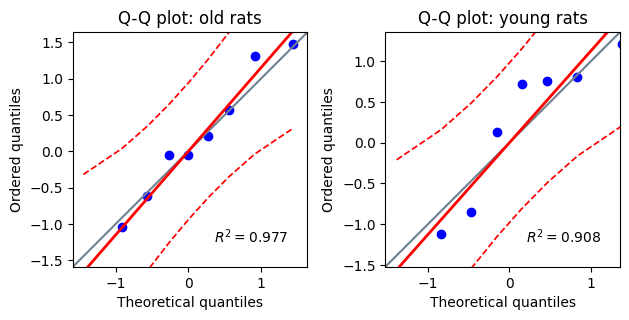

In [6]:
# Plotting Q-Q plots
fig, axes = plt.subplots(1, 2)
titles = ["Q-Q plot: old rats", "Q-Q plot: young rats"]

for i, (data, title) in enumerate(zip([old, yng], titles)):
    pg.qqplot(
        data,
        dist='norm',
        ax=axes[i],
        confidence=0.95,)
    axes[i].set_title(title)

plt.tight_layout()  # Ensures plots don't overlap

While the *unpaired t-test is reasonably robust* to moderate deviations from normality, *especially with larger sample sizes*, severe violations can impact the accuracy of the test's results. When the normality assumption is not met, the calculated P value may be unreliable, potentially leading to incorrect conclusions about the statistical significance of the difference between group means.

In such cases, we have a few options:
- Transform the data: if the data exhibits a clear pattern of non-normality, we might attempt to transform it (e.g., using log transformations or square root transformations) to achieve a more normal distribution.
- Use non-parametric alternatives: when transformations are ineffective or impractical, we can consider non-parametric tests like the Mann-Whitney U test, which do not rely on the normality assumption.
- Proceed with caution: if the sample sizes are relatively large and the deviations from normality are not severe, we might proceed with the unpaired t-test, acknowledging the potential limitations in the interpretation of the results.

#### Homoscedasticity testing

Another crucial assumption underlying the unpaired t-test is that the variances (or spreads) of the two groups being compared are approximately equal. This property is known as **homoscedasticity**. In this subsection, we'll explore the importance of this assumption and introduce statistical tests, such as Levene's test, that help us assess whether our data meets this criterion.

##### F-test of equality of variances

The **F-test**, formally known as the *F-test of equality of variances*, is a statistical method used to compare the variances of two or more groups. In our context, it assesses whether the 'old' and 'young' groups have significantly different variances. The test calculates an F-statistic based on the *ratio of the group variances* and their respective *sample sizes*. This F-statistic is then compared to an **F distribution** to obtain a P value.

In [7]:
# Calculate sample variances s (unbiased estimator)
var_old = np.var(old, ddof=1)
var_yng = np.var(yng, ddof=1)

# Calculate the ratio of variances
var_ratio = var_old / var_yng

# Sample sizes
n_old = len(old)
n_yng = len(yng)

# Degrees of freedom
df_old = n_old - 1
df_yng = n_yng - 1

# Calculate the F-statistic
f_statistic = max(var_ratio, 1/var_ratio)  #  ensures that the F-statistic >= 1

# Calculate the p-value using the F-distribution (two-sided test)
p_value_fstat = 2 * (1 - stats.f.cdf(f_statistic, df_old, df_yng))

# Print the results
print(f"Variance ratio (old/young) = {var_ratio:.3f}")
print(f"F-statistic = {f_statistic:.3f}")
print(f"P value for the F-test of equal variance (manual calculation) = {p_value_fstat:.4f}")

Variance ratio (old/young) = 2.412
F-statistic = 2.412
P value for the F-test of equal variance (manual calculation) = 0.2631


Assuming the null hypothesis of equal variances is true, there is a 26.31% probability that we would observe a discrepancy between the sample standard deviations as large as (or larger than) the one we found, purely due to random sampling. Let's visualize the F-statistic, critical F-value, and the area (P value) under the F distribution corresponding to our dataset.

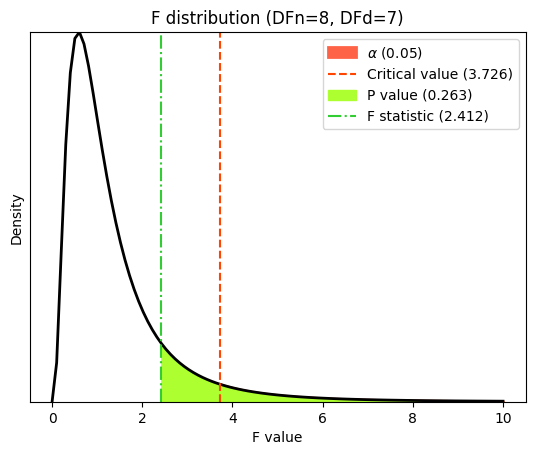

In [8]:
# Significance level (alpha)
alpha = 0.05

# Calculate critical value
f_crit = stats.f.ppf(1 - alpha, df_old, df_yng)

# Generate x values for plotting
x = np.linspace(0, 10, 100)
hx = stats.f.pdf(x, df_old, df_yng)

# Create the plot
plt.plot(x, hx, lw=2, color="black")

# Shade the probability alpha
plt.fill_between(
    x[x >= f_crit],
    hx[x >= f_crit],
    linestyle="-",
    linewidth=2,
    color='tomato',
    label=fr'$\alpha$ ({alpha})')

# Plot the critical value
plt.axvline(
    x=f_crit, # type: ignore
    color='orangered',
    linestyle='--',
    label=fr'Critical value ({f_crit:.3f})')

# Shade the P value area
plt.fill_between(
    x[x >= f_statistic],
    hx[x >= f_statistic],
    color='greenyellow',
    label=f'P value ({p_value_fstat:.3f})')

# Plot the observed F-statistic
plt.axvline(
    x=f_statistic, # type: ignore
    color='limegreen',
    linestyle='-.',
    label=fr'F statistic ({f_statistic:.3f})')

# Add labels and title
plt.xlabel('F value')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(fr"F distribution (DFn={df_old}, DFd={df_yng})")
plt.legend();

In the context of homoscedasticity tests like Levene's test or Bartlett's test, the *null hypothesis states that the variances are equal*.

Therefore:
- High P value: we *fail to reject the null hypothesis*, meaning we do not have enough evidence to say the variances are different. This suggests that the *assumption of equal variances is reasonable*.
- Low P value: we reject the null hypothesis, meaning we have evidence to suggest the *variances are not equal*. This indicates that the assumption of equal variances is violated.

##### Levene and Bartlett tests

We'll now leverage the convenience and robustness of **Levene**'s and **Bartlett**'s tests to evaluate the assumption of equal variances. A deeper dive into the manual F-statistic calculation will come later when we cover ANOVA.

Levene's test assesses the equality of variances across groups by analyzing the *spread of the absolute deviations from a central measure (typically the median)* within each group. The test statistic calculated in Levene's test approximately follows an *F-distribution* under the null hypothesis of equal variances. This allows us to compute a P value to determine the statistical significance of any observed differences in variances.

Bartlett's test also evaluates the homogeneity of variances across groups, but it operates under the assumption that the data within each group is *normally distributed*. The test statistic in Bartlett's test approximately follows a *chi-squared distribution* with degrees of freedom equal to the number of groups minus one, again enabling us to obtain a P value for hypothesis testing. 

While both tests serve the same purpose, Levene's test is generally considered *more robust to deviations from normality* compared to Bartlett's test. Therefore, if we suspect or have evidence that the data might not be perfectly normally distributed, Levene's test is often the preferred choice. On the other hand, if we're confident about the normality of the data, Bartlett's test can be a suitable option.

In [9]:
# Using scipy.stats
# Levene's test for equal variances
levene_statistic, levene_p_value = stats.levene(old, yng)

# Bartlett's test for equal variances
bartlett_statistic, bartlett_p_value = stats.bartlett(old, yng)

# Print the results
print(f"Levene's test statistic = {levene_statistic:.3f}, \
P value = {levene_p_value:.4f}")
print(f"Bartlett's test statistic = {bartlett_statistic:.3f}, \
P value = {bartlett_p_value:.4f}")

Levene's test statistic = 0.686, P value = 0.4204
Bartlett's test statistic = 1.290, P value = 0.2560


In [10]:
# Using pingouin
# Levene's test for equal variances
levene_results = pg.homoscedasticity([old, yng], method='levene')

# Bartlett's test for equal variances
bartlett_results = pg.homoscedasticity([old, yng], method='bartlett')

# Print the results
print("Levene and Bartlett's test results:")
print(levene_results)
print(bartlett_results)

Levene and Bartlett's test results:
               W      pval  equal_var
levene  0.686405  0.420378       True
                 T      pval  equal_var
bartlett  1.290011  0.256046       True


A small P value, indicating a potential violation of the equal variances assumption, presents a nuanced situation. While some fields, including certain areas of biology, might tolerate minor deviations from homoscedasticity, it's generally advisable to adopt a more conservative approach. Consider using **[Welch's t-test](welch)**, which is designed to handle unequal variances, or explore data transformations that might improve the homogeneity of variances. In cases of severe non-normality or highly unequal variances, especially with small sample sizes, consider using the *non-parametric Mann-Whitney U test* as a robust alternative to Welch's t-test, or a [bootstrap approach](bootstrap).

## Assessing the significance of mean differences

The central question in many research studies is whether an intervention, treatment, or characteristic leads to a meaningful difference between groups. In this section, we'll explore how the unpaired t-test helps us answer this question by comparing the means of two independent samples.

In [11]:
mean_diff = np.mean(yng) - np.mean(old)
print(f"Mean difference between old and young rats = {mean_diff:.3f}")

Mean difference between old and young rats = 23.546


### The t-ratio

At the core of the unpaired t-test lies the **t-ratio** (also named *t-value*, or *t-score*), a pivotal statistic that quantifies the *disparity between the means of two groups relative to their combined variability*. The t-ratio used in the unpaired t-test shares a structural resemblance to the *t-statistic* we encountered earlier when [constructing confidence intervals for a single mean](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#the-t-statistic). Both involve a ratio of a difference to a measure of variability and follow a t-distribution. However, the t-ratio in the unpaired t-test focuses on comparing two sample means, while the t-statistic for confidence intervals is used to estimate a single population mean.

In this subsection, we'll delve into the mathematical underpinnings of the t-ratio, exploring how it incorporates sample means, variances, and sample sizes to provide a standardized measure of the difference between groups. Understanding the t-ratio is crucial for interpreting the results of the unpaired t-test and drawing meaningful conclusions about the statistical significance of any observed differences.

(welch)=
### Welch's t-test

#### Manual calculation of the Welch's t-ratio

In the *general case*, where we do not assume equal variances, the t-ratio for the unpaired t-test is often referred to as **Welch's t-statistic**. This test utilizes the following t-statistic:

$$t = \frac{\bar x_1 - \bar x_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

where $\bar x_1$ and $\bar x_2$ are the sample means, $s_1^2$  and $s_2^2$ are the **sample variances** of the two groups, and $n_1$ and $n_2$ are the sample sizes. [Remember the relationships](https://sbwiecko.github.io/intuitive_biostatistics/09%20-%20Quantifying%20Scatter%20of%20Continuous%20Data.html#standard-error-of-the-mean-sem) between variance $s^2$, standard deviation $s$, and standard error $\mathrm{se}^2 = s^2 / n$.

The standard error of the difference between the means, denoted by $\mathrm{se}_\text{unequal}$, is calculated as the square root of the sum of the estimated variances of the two sample means:

$$\mathrm{se}_\text{unequal} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

This standard error accounts for the variability within each group and is used in the denominator of Welch's t-statistic:

$$t = \frac{\bar x_1 - \bar x_2}{\mathrm{se}_\text{unequal}}$$

The degrees of freedom for this t-statistic are approximated using the [Welch-Satterthwaite equation](https://en.wikipedia.org/wiki/Welch-Satterthwaite_equation), which can be further simplified using standard errors:

$$
\begin{aligned}
\mathrm{DF} &= \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}{\frac{(s_1^2 / n_1)^2}{n_1 - 1} + \frac{(s_2^2 / n_2)^2}{n_2 - 1}} \\
&= \frac{\mathrm{se}_\text{unequal}^4}{\frac{(s_1^2 / n_1)^2}{n_1 - 1} + \frac{(s_2^2 / n_2)^2}{n_2 - 1}} \\
&= \frac{\mathrm{se}_\text{unequal}^4}{\frac{\mathrm{se}_1^4}{n_1 - 1} + \frac{\mathrm{se}_2^4}{n_2 - 1}}
\end{aligned}
$$

In [12]:
# Calculate the standard error for unequal variances (Welch's t-test)
# The variances were already calculated for the F-test
se_unequal = np.sqrt(var_old / n_old + var_yng / n_yng)

# Calculate Welch's t-statistic
t_statistic_welch = mean_diff / se_unequal

# Calculate the degrees of freedom using the Welch-Satterthwaite equation
df_welch = se_unequal**4 / ((var_old/n_old)**2/(n_old-1) + (var_yng/n_yng)**2/(n_yng-1))
# se^2 = s/n --> se^4 = (s/n)^2
# Or using the intermediate formula
#df_welch = se_unequal**4 / (((var_old/n_old)** 2)/(n_old-1) + ((var_yng/n_yng)** 2)/(n_yng-1))

# Print the results
print(f"t-statistic (Welch's) = {t_statistic_welch:.4f} with {df_welch:.3f} \
degrees of freedom (Welch-Satterthwaite approximation)")

t-statistic (Welch's) = 3.6242 with 13.778 degrees of freedom (Welch-Satterthwaite approximation)


#### Welch's P value and confidence interval

Now that we have our t-statistic and degrees of freedom, we can determine the **P value** associated with our test, as well as construct a **confidence interval** for the difference between the population means. The P value will quantify the probability of observing a t-statistic as extreme as (or more extreme than) the one we calculated, assuming the null hypothesis of no difference between the group means is true. We will utilize the cumulative distribution function (CDF) of the [t-distribution](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#the-t-distribution) to compute this probability. The confidence interval will provide a range of plausible values for the true difference in population means, giving us a sense of the magnitude of the effect and the uncertainty associated with our estimate. 

In [13]:
# Calculate the P value using the t-distribution (two-sided test)
p_value_welch = 2 * (1 - stats.t.cdf(abs(t_statistic_welch), df_welch))

# Print the results
print(f"P value for Welch's t-test = {p_value_welch:.5f}")

# Calculate the confidence interval (e.g., 95% confidence)
confidence_level = 0.95
margin_of_error_welch = stats.t.ppf((1 + confidence_level) / 2, df_welch) * se_unequal
confidence_interval_welch = (mean_diff - margin_of_error_welch, mean_diff + margin_of_error_welch)

# Print the results
print(f"Mean difference (young - old) = {mean_diff:.3f}")
print(f"95% confidence interval for the mean difference: \
[{confidence_interval_welch[0]:.3f}, {confidence_interval_welch[1]:.3f}]")

P value for Welch's t-test = 0.00283
Mean difference (young - old) = 23.546
95% confidence interval for the mean difference: [9.591, 37.501]


#### Performing the Welch's t-test in Python

Let'ts conduct Welch's t-test using both the `scipy.stats` and `pingouin` libraries in Python. We'll compare their implementations and outputs, highlighting their respective advantages.

In [14]:
# Welch's t-test using SciPy
t_statistic_scipy_welch, p_value_scipy_welch = stats.ttest_ind(yng, old, equal_var=False)

# Welch's t-test using Pingouin
ttest_results_pingouin_welch = pg.ttest(yng, old, correction=True) # type: ignore

# Print the results
print("Welch's t-test results (SciPy):")
print(f"t-statistic = {t_statistic_scipy_welch:.3f}, \
P value = {p_value_scipy_welch:.4f}")

print("\nWelch's t-test results (Pingouin):")
ttest_results_pingouin_welch

Welch's t-test results (SciPy):
t-statistic = 3.624, P value = 0.0028

Welch's t-test results (Pingouin):


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.624246,13.777968,two-sided,0.002828,"[9.59, 37.5]",1.715995,14.51,0.909532


The Welch's t-test yielded a t-statistic of 3.624 with an associated P value of 0.003. This P value is less than the commonly used significance level of 0.05, indicating *strong evidence to reject the null hypothesis of no difference between the means* of the old and young groups of rats. Therefore, we conclude that there is a statistically significant difference in the $\%\text{E}_\text{max}$ between the two groups.

Furthermore, the 95% confidence interval for the mean difference (young - old) is [9.591, 37.501]. This suggests that we can be 95% confident that the true population mean difference lies within this range. The fact that this interval does not include zero further supports the conclusion that the two groups are significantly different.

#### Visualizing the Welch's values

To gain a deeper understanding of the results of Welch's t-test, let's visualize the t-statistic, the critical t-values that define the rejection regions, and the areas under the t-distribution corresponding to the P value. This visual representation will help us grasp the statistical significance of the observed difference between the group means and the role of the degrees of freedom in shaping the t-distribution.

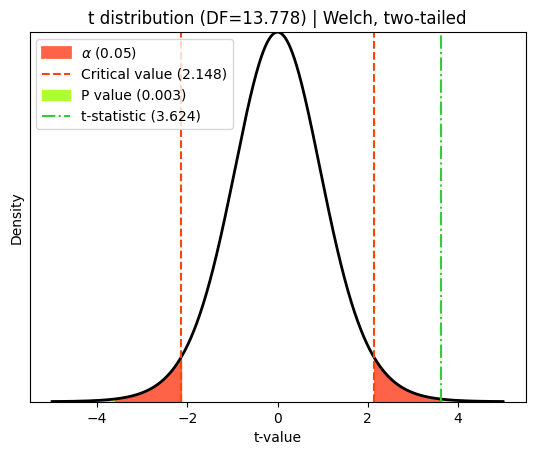

In [15]:
# Significance level (alpha)
alpha = 0.05

# Calculate critical t-values (two-tailed test)
t_crit_lower_welch = stats.t.ppf(alpha/2, df_welch)
t_crit_upper_welch = stats.t.ppf(1 - alpha/2, df_welch)

# Generate x values for plotting
x = np.linspace(-5, 5, 1000)
hx = stats.t.pdf(x, df_welch)

# Create the plot
plt.plot(x, hx, lw=2, color="black")

# Shade the rejection regions (alpha)
plt.fill_between(
    x[x <= t_crit_lower_welch],
    hx[x <= t_crit_lower_welch],
    linestyle="-",
    linewidth=2,
    color='tomato',
    label=fr'$\alpha$ ({alpha})')

plt.fill_between(
    x[x >= t_crit_upper_welch],
    hx[x >= t_crit_upper_welch],
    linestyle="-",
    linewidth=2,
    color='tomato')

# Plot the critical t-values
plt.axvline(
    x=t_crit_lower_welch, # type: ignore
    color='orangered',
    linestyle='--',)

plt.axvline(
    x=t_crit_upper_welch, # type: ignore
    color='orangered',
    linestyle='--',
    label=f'Critical value ({t_crit_upper_welch:.3f})')

# Shade the P-value areas (two-tailed)
plt.fill_between(
    x[x <= -abs(t_statistic_welch)],
    hx[x <= -abs(t_statistic_welch)],
    color='greenyellow',
    label=f'P value ({p_value_welch:.3f})',)

plt.fill_between(
    x[x >= abs(t_statistic_welch)],
    hx[x >= abs(t_statistic_welch)],
    color='greenyellow')

# Plot the observed t-statistic
plt.axvline(
    x=t_statistic_welch,
    color='limegreen',
    linestyle='-.',
    label=f't-statistic ({t_statistic_welch:.3f})')

# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(fr"t distribution (DF={df_welch:.3f}) | Welch, two-tailed")
plt.legend();

The red dashed lines in this diagram represent the critical t-values that define the *rejection regions* for a two-tailed t-test at a 5% significance level. The 'tails' of the curve outside these lines each represent 2.5% of the probability distribution under the null hypothesis (that the true population mean difference is zero).

The green dot-dashed line represents the observed t-statistic calculated from our sample data. The P value corresponds to the total probability of observing a t-statistic as extreme as (or more extreme than) the one we calculated, assuming the null hypothesis is true. In a two-tailed test like this, we consider *both tails of the distribution* because the true population mean difference could be either higher or lower than zero. One-tailed tests [as shown later](one-sided) are used when we have a directional hypothesis, specifically testing if the difference is 'less than zero' or 'greater than zero'.

### Student t-test

While Welch's t-test offers a robust approach for comparing means when variances might be unequal, there are scenarios where we have reason to believe that the variances of the two groups are approximately the same. In such cases, we can employ the standard unpaired t-test, also known as **Student's t-test**. This test relies on the *assumption of equal variances*, leading to a slightly simpler formula for the t-statistic and a different calculation for the degrees of freedom.

#### Student's t-ratio formula

Starting from the general formula of the t-ratio, and under the assumption of equal variance where $s_1^2 = s_2^2 = s_p^2$, the t-ratio for the unpaired t-test assuming equal variances is calculated as follows:

$$
\begin{align}
t &= \frac{\bar x_1 - \bar x_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \\
&= \frac{\bar x_1 - \bar x_2}{\sqrt{s_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}
\end{align}
$$

where $\bar x_1$ and $\bar x_2$ are the sample means, $n_1$ and $n_2$ are the sample sizes, and $s_p^2$ is **[pooled sample variance](https://en.wikipedia.org/wiki/Pooled_variance)** $s_p^2$ calculated as:

$$
\begin{align}
s_p^2 &= \frac{\sum_{i=1}^{n_1}(x_i - \bar x_1)^2 + \sum_{j=1}^{n_2}(x_j - \bar x_2)^2}{n_1 + n_2 - 2} \\
&= \frac{(n_1 - 1) s_1^2 + (n_2 - 1) s_2^2}{n_1 + n_2 - 2}
\end{align}
$$

where $s_1^2$  and $s_2^2$ are the **sample variances** of the two groups. Even if we assume equal variances, we still need to combine the information from both samples to get a more precise estimate of the common variance. 

In the Student's t-test, the standard error of the difference between the means, denoted by $\mathrm{se}_\text{pooled}$, is calculated using the pooled variance as:

$$\mathrm{se}_\text{pooled} = \sqrt{s_p^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}$$


This standard error, which incorporates the pooled estimate of the common variance, is used in the denominator of the t-statistic for the Student's t-test:

$$t = \frac{\bar x_1 - \bar x_2}{\mathrm{se}_\text{pooled}}$$

The degrees of freedom for the Student's t-test (assuming equal variances) are $\mathrm{DF} = n_1 + n_2 - 2$, which directly corresponds to the denominator in the pooled variance formula. This reflects the fact that the pooled variance estimate combines information from both samples, each contributing its degrees of freedom to the final estimate.

In [16]:
# Degrees of freedom for equal variances t-test
df_student = n_old + n_yng - 2

# Calculate pooled variance using the sample variances determined in the previous section
pooled_var = ((n_old-1)*var_old + (n_yng-1)*var_yng) / df_student

# Calculate the pooled standard error
se_pooled = np.sqrt(pooled_var * (1/n_old + 1/n_yng))

# Calculate the Student's t-statistic
t_statistic_student = mean_diff / se_pooled

# Print the results
print(f"t-statistic (Student) = {t_statistic_student:.4f} with \
{df_student} degrees of freedom")

t-statistic (Student) = 3.5315 with 15 degrees of freedom


#### Special case - Equal variances and sample sizes

In the situation where $n_1 = n_2 = n$, and $s_1^2 = s_2^2 = s^2$, with $n$ the *common sample size* and $s^2$ the *common sample variance*:

$$s_p^2 = \frac{(n-1)s^2 + (n-1)s^2}{n + n - 2} = \frac{\cancel{2(n-1)}s^2}{\cancel{2(n - 1)}} = s^2$$

Therefore

$$t = \frac{\bar x_1 - \bar x_2}{s\sqrt{2/n}}$$

and $\mathrm{DF} = 2n -2$.

#### Student's P value and confidence interval

Having calculated the t-statistic and degrees of freedom, we can now determine the P value and construct a confidence interval for the mean difference. Similar to [Welch's t-test](welch), we'll use the t-distribution's CDF to compute the P value, which quantifies the probability of observing such an extreme t-statistic (or more extreme) if the null hypothesis were true. Additionally, the confidence interval will provide a range of likely values for the true difference in population means.

In [17]:
# Calculate the P value using the t-distribution (two-sided test)
p_value_student = 2 * (1 - stats.t.cdf(abs(t_statistic_student), df_student))
# Print the results
print(f"P value for the Student's t-test = {p_value_student:.5f}")

# Calculate the confidence interval (e.g., 95% confidence)
margin_of_error_student = stats.t.ppf((1 + confidence_level) / 2, df_student) * se_pooled 
confidence_interval_student = (mean_diff - margin_of_error_student, mean_diff + margin_of_error_student)

# Print the results
print(f"Mean difference (young - old) = {mean_diff:.3f}")
print(f"95% confidence interval for the mean difference: \
[{confidence_interval_student[0]:.3f}, {confidence_interval_student[1]:.3f}]")

P value for the Student's t-test = 0.00302
Mean difference (young - old) = 23.546
95% confidence interval for the mean difference: [9.335, 37.757]


#### Performing the Student's t-test in Python

We can readily perform the Student's t-test using either `scipy.stats` or `pingouin`. The implementation is nearly identical to Welch's t-test, with the key difference being that we change the `equal_var` (in SciPy) or `correction` (in Pingouin) parameter to explicitly indicate the assumption of equal variances.

In [18]:
# Student's t-test using SciPy (assuming equal variances)
t_statistic_scipy_student, p_value_scipy_student = stats.ttest_ind(yng, old, equal_var=True)

# Student's t-test using Pingouin (assuming equal variances)
ttest_results_pingouin_student = pg.ttest(yng, old, correction=False) # type: ignore

# Print the results
print("Student's t-test results (SciPy):")
print(f"t-statistic = {t_statistic_scipy_student:.3f}, \
P value = {p_value_scipy_student:.4f}")

print("\nStudent's t-test results (Pingouin):")
ttest_results_pingouin_student

Student's t-test results (SciPy):
t-statistic = 3.531, P value = 0.0030

Student's t-test results (Pingouin):


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.531488,15,two-sided,0.003022,"[9.33, 37.76]",1.715995,12.56,0.909532


Similar to the Welch's t-test, the Student's t-test also revealed a statistically significant difference between the two groups. The calculated t-statistic was 3.531, with an associated P value of 0.003. This P value falls below the conventional significance level of 0.05, providing strong evidence to reject the null hypothesis of no difference in the mean $\%\text{E}_\text{max}$ between the 'old' and 'young' groups.

The 95% confidence interval for the mean difference (young - old) is [9.335, 37.757]. This interval suggests we can be 95% confident that the true population mean difference in $\%\text{E}_\text{max}$ lies within this range. The absence of zero within this interval further reinforces the conclusion of a significant difference between the two groups.

#### Visualizing Student's values

To better understand the results of the Student's t-test, let's visualize the t-statistic, critical t-values, and the P value areas under the t-distribution. This visual representation will aid in understanding the statistical significance of the observed mean difference and the impact of degrees of freedom on the t-distribution's shape.

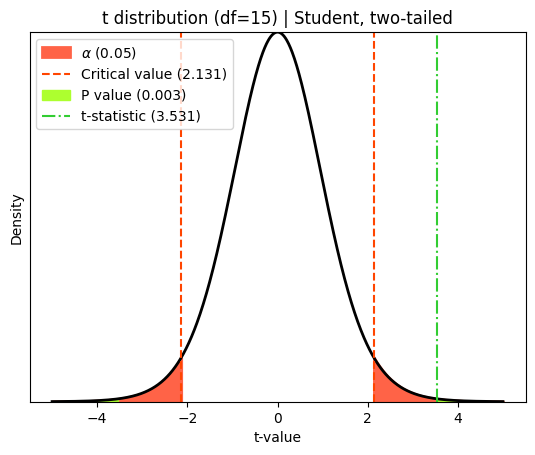

In [19]:
# Calculate critical t-values (two-tailed test)
t_crit_lower_student = stats.t.ppf(alpha/2, df_student)
t_crit_upper_student = stats.t.ppf(1 - alpha/2, df_student)

# Generate x values for plotting
x = np.linspace(-5, 5, 1000)
hx = stats.t.pdf(x, df_student)

# Create the plot
plt.plot(x, hx, lw=2, color="black")

# Shade the rejection regions (alpha)
plt.fill_between(
    x[x <= t_crit_lower_student],
    hx[x <= t_crit_lower_student],
    linestyle="-",
    linewidth=2,
    color='tomato',
    label=fr'$\alpha$ ({alpha})')

plt.fill_between(
    x[x >= t_crit_upper_student],
    hx[x >= t_crit_upper_student],
    linestyle="-",
    linewidth=2,
    color='tomato')

# Plot the critical t-values
plt.axvline(
    x=t_crit_lower_student, # type: ignore
    color='orangered',
    linestyle='--',)

plt.axvline(
    x=t_crit_upper_student, # type: ignore
    color='orangered',
    linestyle='--',
    label=f'Critical value ({t_crit_upper_student:.3f})')

# Shade the P-value areas (two-tailed)
plt.fill_between(
    x[x <= -abs(t_statistic_student)],
    hx[x <= -abs(t_statistic_student)],
    color='greenyellow',
    label=f'P value ({p_value_student:.3f})',)

plt.fill_between(
    x[x >= abs(t_statistic_student)],
    hx[x >= abs(t_statistic_student)],
    color='greenyellow')

# Plot the observed t-statistic
plt.axvline(
    x=t_statistic_student,
    color='limegreen',
    linestyle='-.',
    label=f't-statistic ({t_statistic_student:.3f})')

# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Density')
plt.margins(x=0.05, y=0)
plt.yticks([])
plt.title(fr"t distribution (df={df_student}) | Student, two-tailed")
plt.legend();

### Working with real world data

#### Loading the data

Let's introduce the [Palmer penguins dataset](https://github.com/allisonhorst/palmerpenguins) from the `pingouin` library and demonstrate how to perform an unpaired t-test directly on its columns. We'll also explore one-sided t-tests and investigate the relationship between overlapping error bars and the statistical significance of mean differences.

![Meet the Palmer penguins](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png)

In [20]:
# List all available datasets in pingouin (commented out)
# pg.list_datasets() 

# Load the 'penguins' dataset
penguins = pg.read_dataset('penguins')

# Display the first 5 rows of the dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


#### Understanding the data

Let's print some descriptive statistics for the different variables.

In [21]:
# Display descriptive statistics
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


The culmen is the upper ridge of a bird's bill. In the simplified `penguins` data, culmen length and depth are renamed as variables 'bill_length_mm' and 'bill_depth_mm' to be more intuitive.

For this penguin data, the culmen (bill) length and depth are measured as shown below:
![culmen length and depth](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png)

Let's now create a grid of scatterplots that visualize the relationships between pairs of numerical variables in the `penguins` DataFrame. It also incorporates color-coded distinctions based on the 'species' column and customizes the diagonal plots to display histograms, providing insights into the individual distributions of each variable for each species.

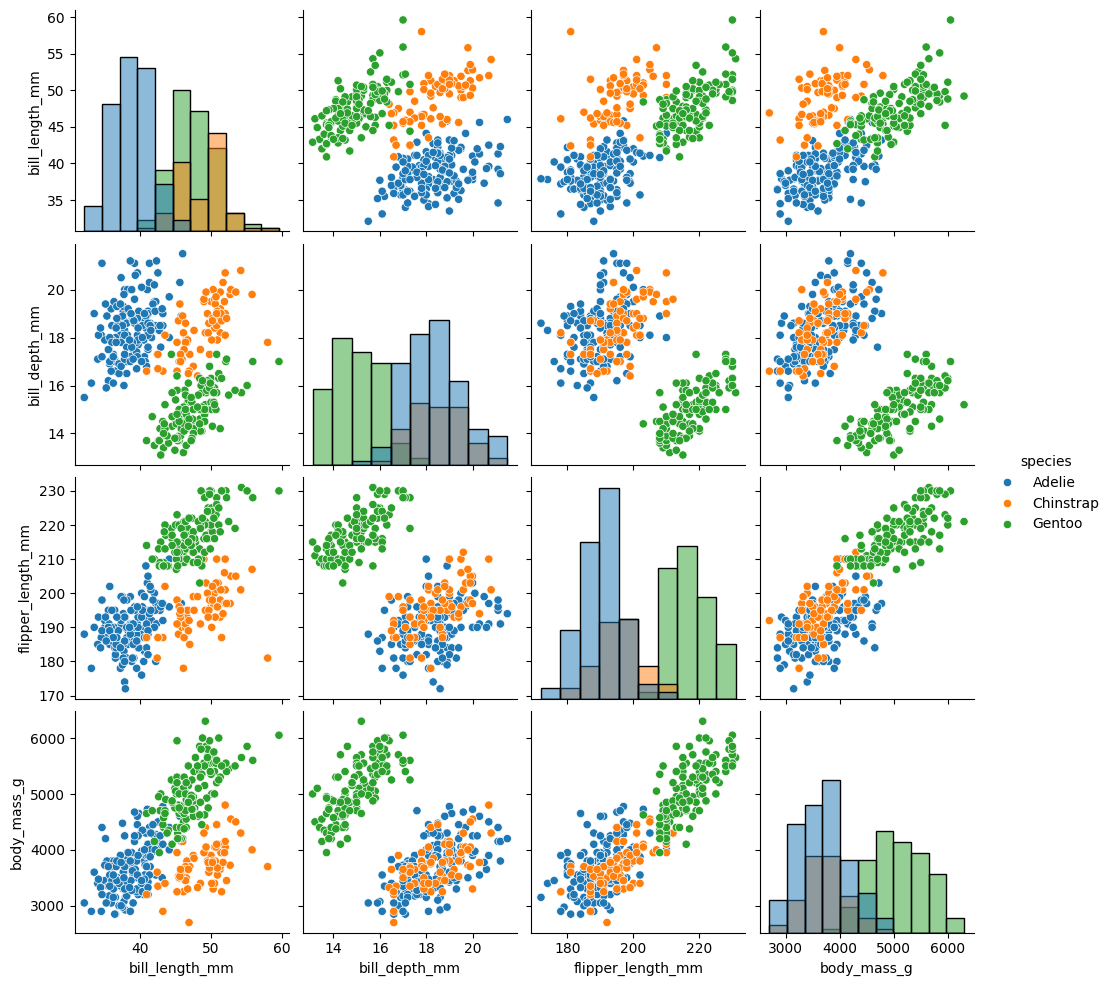

In [22]:
sns.pairplot(penguins, hue="species", diag_kind="hist");

#### Checking assumptions

Flipper length appears to be a promising variable for distinguishing between penguin species. Let's apply the t-test framework we've established to investigate this further. To illustrate the concepts clearly, we'll focus on the two most populous species in the dataset: Adelie and Gentoo. However, it's important to note that in a comprehensive analysis, we would ideally *include all groups and employ ANOVA* (which we'll discuss in a later chapter) to account for potential differences among all species simultaneously.

In [23]:
# Statistics for groups of species
penguins.groupby(by='species')['flipper_length_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,189.953642,6.539457,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,123.0,217.186992,6.484976,203.0,212.0,216.0,221.0,231.0


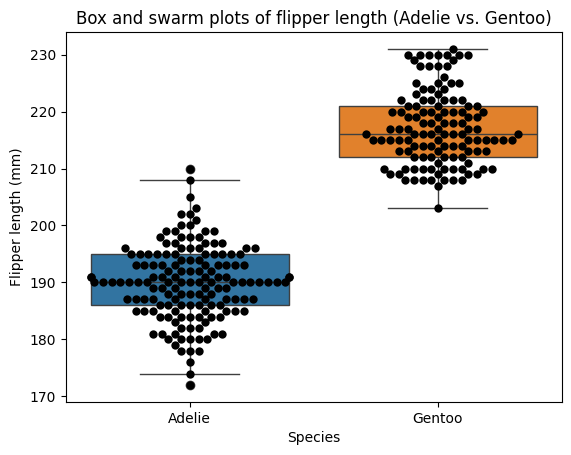

In [24]:
# Remove the Chinstrap species
penguins_filtered = penguins[penguins['species'] != 'Chinstrap'].copy()  # Create a copy to avoid modifying the original DataFrame

# Box and swarm plots
sns.boxplot(
    data=penguins_filtered,
    x='species',
    y='flipper_length_mm',
    hue='species')
sns.swarmplot(
    data=penguins_filtered,
    x='species',
    y='flipper_length_mm',
    color='black',
    size=6)

plt.xlabel('Species')
plt.ylabel('Flipper length (mm)')
plt.title("Box and swarm plots of flipper length (Adelie vs. Gentoo)");

In [25]:
# Perform tests using our own function (see normality testing)
normality_tests(
    adelie_flipper:=penguins_filtered.loc[penguins_filtered['species'] == 'Adelie', 'flipper_length_mm'].values,
    "Adelie penguins")

print('\n')

normality_tests(
    gentoo_flipper:=penguins_filtered.loc[penguins_filtered['species'] == 'Gentoo', 'flipper_length_mm'].values,
    "Gentoo penguins")

----Normality tests for Adelie penguins----
Test                 W      P value  normal
D'Agostino-Pearson   1.08   0.582    True
Shapiro-Wilk         0.99   0.720    True
-------------------------------------------


----Normality tests for Gentoo penguins----
Test                 W      P value  normal
D'Agostino-Pearson   6.12   0.047    False
Shapiro-Wilk         0.96   0.002    False
-------------------------------------------


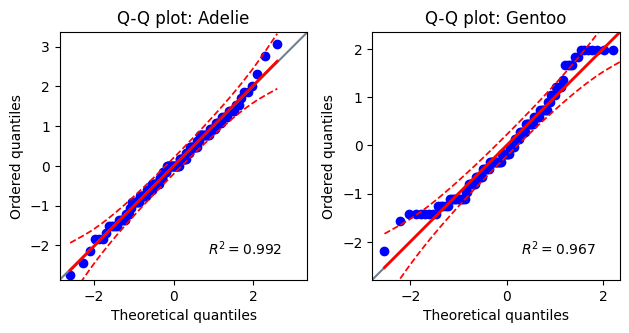

In [26]:
# Plotting Q-Q plots
fig, axes = plt.subplots(1, 2)
titles = ["Q-Q plot: Adelie", "Q-Q plot: Gentoo"]

for i, (data, title) in enumerate(zip([adelie_flipper, gentoo_flipper], titles)):
    pg.qqplot(
        data,
        dist='norm',
        ax=axes[i],
        confidence=0.95,)
    axes[i].set_title(title)

plt.tight_layout()  # Ensures plots don't overlap

In [27]:
# Levene's test for equal variances
# Note the difference with the method call on a DataFrame compared to arrays
pg.homoscedasticity(
    data=penguins_filtered,
    dv='flipper_length_mm',
    group='species',
    method='levene')

,W,pval,equal_var
levene,NaN,NaN,False


#### The problem of missing values

The Levene's test returned `NaN` values and `equal_var=False`. This discrepancy is unexpected, given the similar standard deviations and sample sizes observed in the descriptive statistics. It's likely that missing values are causing Levene's test to fail, as many statistical tests struggle to handle `NaN` values. Let's investigate whether the `adelie_flipper` or `gentoo_flipper` arrays contain any missing data.

In [28]:
penguins_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            276 non-null    object 
 1   island             276 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   sex                265 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.2+ KB


As there are some missing non-null values in the dataset, and in the 'flipper_length_mm' columns in particular, we'll need to decide how to handle them, e.g., remove rows with missing values, or impute missing values, before running the test again. Let's drop the rows containing missing values in the 'flipper_length_mm' column.

In [29]:
penguins_filtered_clean = penguins_filtered.dropna(subset='flipper_length_mm')

pg.homoscedasticity(
    data=penguins_filtered_clean,
    dv='flipper_length_mm',
    group='species',
    method='levene')

,W,pval,equal_var
levene,0.157042,0.692205,True


#### Performing t-test

While the flipper length data for Adelie penguins appears to be normally distributed, the Gentoo flipper lengths show some deviation from normality, particularly at the extremes. However, given the relatively large sample sizes (n=151 for Adelie and n=123 for Gentoo), we can proceed with the **Student's t-test** (assuming equal variances), acknowledging the potential limitations due to this minor departure from normality. Though, the most appropriate statistical test would be to compare all the groups using ANOVA (discussed in a future chapter).

In [30]:
# Perform Student t-test
pg.ttest(
    x=adelie_flipper,  # the method removes missing values by default
    y=gentoo_flipper,
    correction=False # type: ignore
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-34.414958,272,two-sided,4.211309e-101,"[-28.79, -25.68]",4.18005,1.128e+97,1.0


The extremely small P value (4.211e-101) is far below the typical significance level of 0.05. This provides overwhelming evidence to reject the null hypothesis of no difference between the two group means.

The 95% confidence interval [-28.79, -25.68] provides a range of plausible values for the true difference between the population means. The fact that this interval doesn't include zero further supports the conclusion of a significant difference.

Therefore, we can conclude that there is a statistically significant difference between the means of the two groups being compared.

#### Overlapping distributions

In the previous example with flipper length, we observed that non-overlapping distributions generally corresponded to a statistically significant difference in means. However, it's important to remember that *overlapping distributions do not necessarily imply the absence of a significant difference*. The statistical significance of the mean difference depends on various factors, including the degree of overlap, sample sizes, and the variability within each group.

Let's examine the 'bill_depth_mm' variable for Adelie and Gentoo penguins.

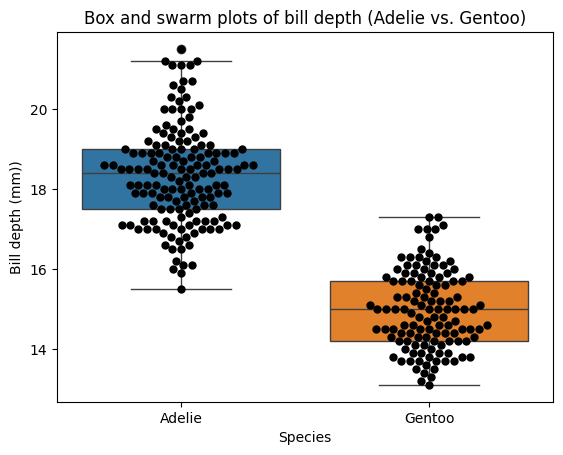

In [31]:
# Box and swarm plots
sns.boxplot(
    data=penguins_filtered,
    x='species',
    y='bill_depth_mm',
    hue='species')
sns.swarmplot(
    data=penguins_filtered,
    x='species',
    y='bill_depth_mm',
    color='black',
    size=6)

plt.xlabel('Species')
plt.ylabel('Bill depth (mm))')
plt.title("Box and swarm plots of bill depth (Adelie vs. Gentoo)");

In [32]:
# Perform Student t-test
pg.ttest(
    x=penguins_filtered.loc[penguins_filtered['species'] == 'Adelie', 'bill_depth_mm'],
    y=penguins_filtered.loc[penguins_filtered['species'] == 'Gentoo', 'bill_depth_mm'],
    correction=False # type: ignore
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,24.792495,272,two-sided,9.311098e-72,"[3.1, 3.63]",3.011303,8.109e+67,1.0


Furthermore, overlapping error bars do not necessarily imply that the means of the populations are not significantly different. The degree of overlap, the sample sizes, and the variability within each group all play a role in determining statistical significance. It's always crucial to conduct formal hypothesis tests, like the t-test, to draw valid conclusions about differences between groups.

This observation is particularly relevant when dealing with distributions based on low sample sizes, as their error bars tend to be wider, leading to more overlap even when there might be a true difference in population means. It's essential to rely on the P value from the t-test rather than solely on visual inspection of error bar overlap, especially when sample sizes are small.

We can use the following rules of thumbs:

| Type of error bar                | Overlapping error bars | Non-overlapping error bars |
|----------------------------------|------------------------|----------------------------|
| Standard deviation (SD)          | No conclusion          | No conclusion              |
| Standard error of the mean (SEM) | Likely P > 0.05        | No conclusion              |
| 95% confidence interval (CI)     | No conclusion          | Likely P < 0.05            |

(one-sided)=
#### One-sided t-test

In our penguin dataset scenario, we aim to determine if the bill depth of Adelie penguins, after subtracting 3 mm, is still significantly greater than the bill depth of Gentoo penguins. Mathematically, we want to test if: $\bar x_\text{Adelie} - 3 > \bar x_\text{Gentoo}$. We can restate $\bar x_{\text{Adelie} - 3} > \bar x_\text{Gentoo}$. This allows us to frame our hypotheses for a **one-sided t-test**:

- Null hypothesis (H0): the mean bill depth of Adelie penguins, minus 3 mm, is equal to or less than the mean bill depth of Gentoo penguins ($\bar x_\text{Adelie - 3} \le \bar x_\text{Gentoo}$).
- Alternative hypothesis (H1): the mean bill depth of Adelie penguins, minus 3 mm, is greater than the mean bill depth of Gentoo penguins.

Let's conduct a one-sided t-test on our sample data to evaluate these hypotheses.

In [33]:
# Perform one-sided Student t-test with pingouin
pg.ttest(
    x=penguins_filtered.loc[penguins_filtered['species'] == 'Adelie', 'bill_depth_mm'] - 3,
    # Missing values are automatically removed from the data in pingouin
    y=penguins_filtered.loc[penguins_filtered['species'] == 'Gentoo', 'bill_depth_mm'],
    correction=False, # type: ignore
    alternative='greater',
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.684262,272,greater,0.003858,"[0.14, inf]",0.326031,7.951,0.849133


In [34]:
# Perform one-sided Student t-test with scipy.stats
stats.ttest_ind(
    penguins_filtered.loc[penguins_filtered['species'] == 'Adelie', 'bill_depth_mm'] - 3,
    penguins_filtered.loc[penguins_filtered['species'] == 'Gentoo', 'bill_depth_mm'],
    equal_var=True,
    alternative='greater',
    nan_policy='omit',  # scipy doesn't remove missing values automatically
)

TtestResult(statistic=2.684262207738359, pvalue=0.003857530781549446, df=272.0)

In [35]:
# Finally statsmodels also offers a comprehensive t-test API
import statsmodels.api as sm

# Perform Student's t-test
ttest_results_sm = sm.stats.ttest_ind(
    x1=penguins_filtered_clean.loc[penguins_filtered['species'] == 'Adelie', 'bill_depth_mm'],
    # statsmodels doesn't support policy for missing values
    x2=penguins_filtered_clean.loc[penguins_filtered['species'] == 'Gentoo', 'bill_depth_mm'],
    usevar='pooled',       # Specify equal variances assumption
    alternative='larger',  # Test if the Adelie bill depth mean (x1) is larger
    value=3                # difference between the means (x1 - x2) under the null hypothesis
)

# Extract and print the relevant statistics
t_statistic_sm = ttest_results_sm[0]
p_value_sm = ttest_results_sm[1]
df_sm = ttest_results_sm[2]

print(f"Student's t-test results:")
print(f"t-statistic = {t_statistic_sm:.3f}, P value = {p_value_sm:.5f}, DF= {df_sm}")

Student's t-test results:
t-statistic = 2.684, P value = 0.00386, DF= 272.0


(bootstrap)=
## Bootstrapping and permutation tests

**Bootstrapping** offers a powerful alternative for statistical inference, allowing us to *estimate parameters and confidence intervals* directly from the data itself, without relying on strong assumptions about the underlying population distribution. This approach, known as **non-parametric inference**, was previously encountered in the [chapter on calculating the confidence interval of a mean (univariate)](https://sbwiecko.github.io/intuitive_biostatistics/12%20-%20Confidence%20Interval%20of%20a%20Mean.html#resampling).

While bootstrapping is primarily used for estimation, **permutation tests**, another resampling-based method, are specifically designed for *hypothesis testing*. They can be employed to test various hypotheses, such as the null hypothesis of exchangeability (where group labels are irrelevant) or the hypothesis of equal means after shifting the group means to a common value.

### The essence of bootstrapping

The core idea behind bootstrapping is to treat our observed sample as *miniature representation of the population*. We repeatedly resample from our original sample to create *multiple bootstrap samples*. Each replicate is generated by **randomly sampling (with replacement)** from the original data, creating a new dataset of the **same size**.

The power of bootstrapping lies in its ability to empirically estimate the sampling distribution of a statistic of interest, such as the difference between group means. By calculating this statistic for each bootstrap sample, we generate a **bootstrap distribution**. This distribution serves as an *approximation* of how the statistic would vary if we were to repeatedly sample from the population. It's important to note that while the **Central Limit Theorem** guarantees that the distribution of sample means approaches a normal distribution as the sample size increases, bootstrapping doesn't rely on this assumption. It directly leverages the empirical distribution of the data to make inferences. Learn more on bootstrap and computer-intensive methods in [Wilcox (2010)](https://link.springer.com/chapter/10.1007/978-1-4419-5525-8_6) and [Manly and Navarro Alberto (2020)](https://doi.org/10.1201/9780429329203).

For now, let's return to the example of bladder muscle relaxation in old and young rats, where we have relatively small sample sizes. This scenario provides an excellent opportunity to showcase the power and utility of bootstrapping and permutation tests in handling such data limitations. 

In [36]:
# Set random seed for reproducibility
np.random.seed(111)

# Generate 10,000 bootstrap replicates of the mean for each group
# !Make sure to choose exactly N elements randomly **with replacement**
n_replicates = 10000
bs_old_means = np.array(
    [np.mean(
        np.random.choice(
            old,
            size=len(old),
            replace=True
        )) for _ in range(n_replicates)
    ])
bs_yng_means = np.array([
    np.mean(np.random.choice(yng, size=len(yng), replace=True)) for _ in range(n_replicates)
    ])

# Calculate the difference between the bootstrap means for each replicate (cast operation on numpy arrays)
bs_mean_diff = bs_yng_means - bs_old_means
print(bs_mean_diff[:10])  # print the 10 first replicates

[25.07916667 23.89166667 22.01944444 29.45277778 23.34027778 26.37083333
 22.95277778 19.46666667 27.01388889 27.89444444]


### Estimate of the confidence interval

Once we have the bootstrap distribution, we can [estimate the confidence interval](https://courses.washington.edu/matlab1/Bootstrap_examples.html) by finding the percentiles corresponding to the desired confidence level.

For a 95% confidence interval, we typically use the 2.5th and 97.5th percentiles of the bootstrap distribution. This means that 95% of the bootstrap estimates fall within this interval, providing a range of plausible values for the true population parameter.

In [37]:
# Calculate the 95% confidence interval using np.percentile
bs_CI_mean_diff = np.round(np.percentile(bs_mean_diff, [2.5, 97.5]), 2)

# Print the results
print(f"Bootstrap estimate of rthe mean difference  = {np.mean(bs_mean_diff):5.2f}")
print(f"Corresponding 95% CI estimate = {bs_CI_mean_diff}")

Bootstrap estimate of rthe mean difference  = 23.44
Corresponding 95% CI estimate = [11.52 35.54]


It's generally expected that the confidence interval obtained through bootstrapping (here [11.52, 35.54]) will be reasonably similar to the confidence interval calculated using the t-distribution (here [9.335, 37.76]), especially when the sample size is sufficiently large, and the underlying assumptions of the t-test are met. Interestingly, the confidence interval obtained through bootstrapping is narrower than the one derived from the t-distribution, despite having lower sample sizes. This might seem counterintuitive, as we generally expect wider confidence intervals with smaller sample sizes due to increased uncertainty.

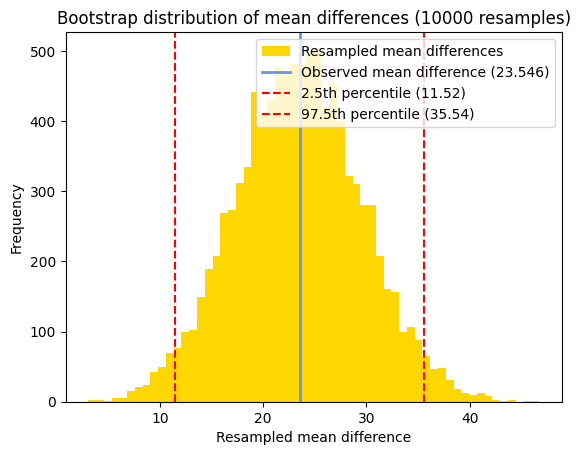

In [38]:
# Plot the histogram of the bootstrap distribution
plt.hist(
    bs_mean_diff,
    density=False,
    bins='auto',  # or use bins=int(n_replicates**.5)
    color='gold',
    # alpha=.75,
    label='Resampled mean differences')

# Annotate the observed mean difference
plt.axvline(
    x=mean_diff, # type: ignore
    color='cornflowerblue',
    linestyle='-', lw=2,
    label=f'Observed mean difference ({mean_diff:.3f})')

# Add lines for the confidence interval
plt.axvline(
    x=bs_CI_mean_diff[0],
    color='red',
    linestyle='--',
    label=f'2.5th percentile ({bs_CI_mean_diff[0]:.2f})')
plt.axvline(
    x=bs_CI_mean_diff[1],
    color='red',
    linestyle='--',
    label=f'97.5th percentile ({bs_CI_mean_diff[1]:.2f})')

# Add labels and title
plt.xlabel('Resampled mean difference')
plt.ylabel('Frequency')
plt.title(f"Bootstrap distribution of mean differences ({n_replicates} resamples)")
plt.legend();

Bootstrapping relies entirely on the data in the original sample. If, by chance, the original samples have less variability or happen to be more representative of their respective populations, the bootstrap distribution might exhibit less spread, leading to a narrower confidence interval. And as bootstrapping involves random resampling, which introduces some inherent variability in the results, it's possible that the particular set of bootstrap samples generated in this instance led to a slightly narrower confidence interval than the theoretical one based on the t-distribution. Moreover, the t-distribution-based confidence interval assumes that the data follows a normal distribution. If the actual data deviates from normality, especially in the tails, the t-distribution might overestimate the variability, resulting in a wider confidence interval than necessary.

### Bootstrapping with pingouin

The `compute_bootci` method from the `pingouin` library proves to be a valuable asset in such scenarios, as it streamlines the process of generating confidence intervals using bootstrapping. It eliminates the need for manual creation of bootstrap samples, offering a variety of methods for confidence interval computation, including the normal approximation, percentile bootstrap, and bias-corrected percentile method. Additionally, it provides the flexibility to return the entire bootstrap distribution, enabling further exploration and visualization of the resampling results.

In [39]:
# Calculate 95% percentile bootstrap confidence interval using pingouin
bs_ci, bt = pg.compute_bootci(
    x=yng,
    y=old,
    func=lambda x,y : np.mean(x) - np.mean(y),
    confidence=0.95,
    method='cper',  # Bias-corrected percentile method (default)
    seed=111,
    decimals=3,
    n_boot=10000,
    return_dist=True)

print(f"95% percentile bootstrap confidence interval (pingouin): ({bs_ci[0]:.3f}, {bs_ci[1]:.3f})")
bt[:10]

95% percentile bootstrap confidence interval (pingouin): (11.506, 35.849)


array([21.42361111, 21.01527778, 35.11944444, 34.98194444, 16.35555556,
       18.95555556, 29.72083333, 19.16944444, 22.78333333, 25.49027778])

### Bootstrap P value

**Bootstrapping and permutation** tests offer remarkable flexibility in hypothesis testing, going beyond the traditional t-statistic used in t-tests. As we've seen, resampling techniques can generate data for constructing confidence intervals around various test statistics. But we can also strategically manipulate the data to simulate the null hypothesis, enabling us to compute P values that assess the likelihood of observing our data under the assumption of no effect.

The key is to choose a **test statistic** that is relevant to the hypothesis being tested and calculate it *consistently for both the original data and the resampled or permuted data*. For instance, when the primary goal is to compare the means of two groups, the **mean difference** or the **t-statistic** can serve as simple and effective test statistics. However, the flexibility of resampling methods allows us to explore other relevant statistics as well. We can examine the *median difference* when dealing with skewed data or outliers, the *ratio of means* for assessing relative differences, or even differences in specific *quantiles* to capture distributional characteristics. Furthermore, if the research question extends beyond comparing means and focuses on the overall difference in distributions, statistics like the [**Kolmogorov-Smirnov statistic**](https://sbwiecko.github.io/intuitive_biostatistics/24%20-%20Normality%20Tests%20and%20Outliers.html#kolmogorov-smirnov-test) can be employed within the bootstrapping or permutation framework. 

Ultimately, the choice of test statistic should be guided by the specific hypotheses being tested and the nature of the data. The adaptability of bootstrapping and permutation tests empowers researchers to tailor their analyses precisely to the requirements of their study, providing a robust and versatile approach to statistical inference.

#### Bootstrapped t-statistics of shifted data

[Bradley Efron](https://academic.oup.com/biomet/article-abstract/68/3/589/218600?redirectedFrom=fulltext&login=false) proposes an elegant bootstrapping algorithm for comparing the means of two independent samples, even when their variances might differ. This approach involves shifting the data in each group to have a common mean, effectively simulating the null hypothesis of equal population means.

Specifically, we create two new datasets where the values are **shifted** as follows: $x_{1i}' = x_{1i} - \bar x_1 + \bar z$, and $x_{2i}' = x_{2i} - \bar x_2 + \bar z$, where $\bar z$ is the mean of the *combined sample*. Next, we perform the following steps $B$ times (e.g., $B = 10000$):

1. Draw a bootstrap sample $x_{1i}^*$ of size $n_1$ with replacement from $x_{1i}'$
2. Draw another bootstrap sample $x_{2i}^*$ of size $n_2$ with replacement from $x_{2i}'$
3. Calculate [Welch's t-statistic](welch) $t^*$ using the bootstrap samples.

Finally, we [estimate the P value](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Bootstrap_hypothesis_testing) as the proportion of bootstrap t-statistics that are as extreme as or more extreme than the observed t-statistic $t$ from our original data:

$$p = \frac{\sum_{i=1}^B I\{t_i^* \ge t \}}{B}$$

where $I\{\text{condition}\} = 1$ if the *condition* is true and $0$ otherwise. This P value represents the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated from our original data, assuming the null hypothesis (H0) of equal population means is true.

In [40]:
# Set the random seed for reproducibility
np.random.seed(111)  

n_replicates = 10000

# Calculate the combined mean of both groups
combined_mean = np.mean(np.concatenate([old, yng]))

# Shift the data in each group to have the same mean (combined_mean)
old_shifted = old - np.mean(old) + combined_mean
yng_shifted = yng - np.mean(yng) + combined_mean

# Generate 10,000 bootstrap replicates for each shifted group
bs_shifted_old = np.array([
    np.random.choice(old_shifted, size=len(old), replace=True) for _ in range(n_replicates)])
bs_shifted_yng = np.array([
    np.random.choice(yng_shifted, size=len(yng), replace=True) for _ in range(n_replicates)])

# Calculate sample means and variances for each bootstrap replicate
# !np.mean calculates the mean of the entire flattened array by default if no 'axis' is provided
bs_shifted_old_means = np.mean(bs_shifted_old, axis=1)  # Calculate mean along each row (replicate)
bs_shifted_yng_means = np.mean(bs_shifted_yng, axis=1)

bs_shifted_old_vars = np.var(bs_shifted_old, ddof=1, axis=1)  # Calculate variance along each row
bs_shifted_yng_vars = np.var(bs_shifted_yng, ddof=1, axis=1)

# Calculate the standard error for the difference in means for each replicate (assuming unequal variances)
bs_se_unequal = np.sqrt(bs_shifted_old_vars / len(old) + bs_shifted_yng_vars / len(yng))

# Calculate Welch's t-statistic for each bootstrap replicate
bs_t_statistic_welch = (bs_shifted_yng_means - bs_shifted_old_means) / bs_se_unequal

# Reminds the observed t-statistic calculated earlier
print(f"Observed t-statistic (Welch's) = {t_statistic_welch:.4f}")

# Print the first 15 t-statistics from the bootstrap replicates
print(bs_t_statistic_welch[:15])

Observed t-statistic (Welch's) = 3.6242
[ 0.3117061   0.04728963 -0.30521782  0.8322539  -0.03140883  0.49586349
 -0.0809322  -0.76470241  0.51108061  0.84035053 -2.5197374   0.16208369
 -2.19024079  0.38957005  2.06971633]


In [41]:
# Calculate the P value using bootstrapping (one-tailed test, assuming unequal variances)
p_value_bs_shifted = np.sum(bs_t_statistic_welch >= t_statistic_welch) / len(bs_t_statistic_welch)

# Print the P value
print(f"P value obtained using bootstrapped t-statistics = {p_value_bs_shifted:.4f}")

P value obtained using bootstrapped t-statistics = 0.0026


We can visualize the P value by plotting the histogram of bootstrapped t-statistics (after shifting the data to a common mean). The P value corresponds to the area under the histogram where the t-statistic is greater than or equal to the observed t-statistic.

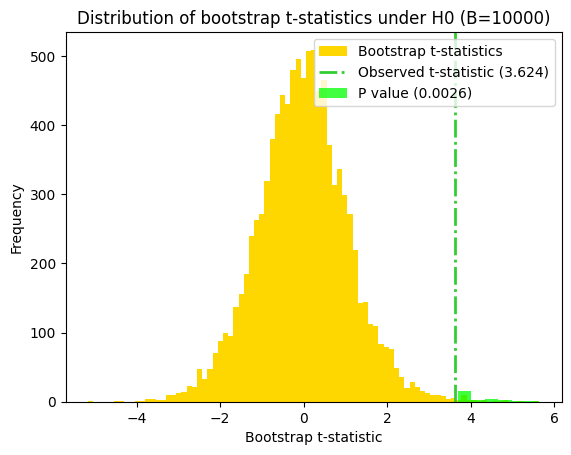

In [42]:
# Plot the histogram of the bootstrap t-statistics
plt.hist(
    bs_t_statistic_welch,
    density=False,
    bins='auto',
    color='gold',
    # alpha=0.75,
    label='Bootstrap t-statistics')

# Annotate the observed t-statistic
plt.axvline(
    x=t_statistic_welch,
    color='limegreen',
    linestyle='-.', lw=2,
    label=f'Observed t-statistic ({t_statistic_welch:.3f})')

# Plot the histogram of the bootstrap t-statistics, only the part to the right of the observed t-statistic
plt.hist(
    bs_t_statistic_welch[bs_t_statistic_welch >= t_statistic_welch],
    density=False,
    bins='auto',
    color='lime',
    alpha=0.75,
    label=f'P value ({p_value_bs_shifted:.4f})')

# Add labels and title
plt.xlabel('Bootstrap t-statistic')
plt.ylabel('Frequency')
plt.title(f"Distribution of bootstrap t-statistics under H0 (B={n_replicates})")
plt.legend();

#### Permutation

The permutation/shuffle method involves combining all the data, **shuffling** the labels, and then reassigning them to create new "groups." This is typically used when we want to test the *null hypothesis of identical distributions* between the two groups, not just equal means. It's a more general approach that doesn't assume any specific distributional form.

To facilitate the permutation test, we'll define a function that shuffles the original arrays and returns permutation samples. This function will be instrumental in creating datasets where the group labels have been randomly reassigned, allowing us to simulate the null hypothesis of no difference between the groups. For further exploration of permutation and bootstrapping techniques, refer to the [dc_stat_think repository from Justin Bois](https://github.com/justinbois/dc_stat_think).

In [43]:
def permutation_sample(data1, data2):
    """Generate a permutation sample by combining and shuffling two datasets.

    This function concatenates `data1` and `data2`, randomly shuffles the
    combined array, and then splits it back into two arrays with the 
    original sizes of `data1` and `data2`, respectively.

    Args:
        data1: A one-dimensional array-like object representing the first dataset.
        data2: A one-dimensional array-like object representing the second dataset.

    Returns:
        A tuple containing two NumPy arrays:
            - permuted_data1: A shuffled version of `data1`.
            - permuted_data2: A shuffled version of `data2`.
    """

    # Combine the two datasets into a single array
    combined_data = np.concatenate([data1, data2])

    # Shuffle the combined data in-place
    np.random.shuffle(combined_data)

    # Split the shuffled data back into two arrays with original sizes
    permuted_data1 = combined_data[:len(data1)]
    permuted_data2 = combined_data[len(data1):]

    return permuted_data1, permuted_data2

The core concept of the permutation test is to repeatedly shuffle the group labels of the original data, effectively simulating the null hypothesis where there's no true difference between the groups. For each shuffled dataset, we calculate the mean difference (our *test statistic*) and create a distribution of these permuted mean differences. We then assess how often these permuted differences are as extreme as, or more extreme than, the observed mean difference in our original data. This proportion represents the P value, indicating the probability of observing such an extreme difference by chance if the null hypothesis were true.

In [44]:
# Set random seed for reproducibility
np.random.seed(111)

# Generate 10,000 bootstrap replicates of the mean difference for each permutation samples
n_replicates = 10000

# Initialize an empty array to store the bootstrap mean differences
bs_mean_diff_shuffled = np.zeros(n_replicates)

# Generate bootstrap replicates of the mean difference for each permutation sample
for i in range(n_replicates):
    # Generate a new permuted sample
    x, y = permutation_sample(old, yng)

    # Calculate the mean difference for this permuted sample
    bs_mean_diff_shuffled[i] = np.mean(x) - np.mean(y)

# We could also use a list comprehension instead of the loop
#bs_mean_diff_shuffled = np.array([np.mean(x) - np.mean(y) for _ in range(n_replicates) for x, y in [permutation_sample(old, yng)]])

# Print the first 10 replicates
print(bs_mean_diff_shuffled[:10])

[ -5.45972222  -6.475       13.73611111  -4.79861111   7.3375
   7.40833333 -12.           4.71666667 -15.96666667  -5.50694444]


The core logic for calculating the P value remains consistent between the permutation test and the mean-shifting approach. In both cases, we estimate the P value as the proportion of replicates (permuted mean differences or bootstrapped t-statistics from shifted data) that are as extreme as, or more extreme than, the observed statistic (the original mean difference or t-statistic). The fundamental distinction lies in how the null hypothesis is simulated. The permutation test achieves this by shuffling group labels, while the mean-shifting approach shifts the data in each group to a common mean, effectively assuming no difference between the groups.

In [45]:
# Calculate the P value using the permutation distribution of mean differences
p_value_permutation = np.sum(bs_mean_diff_shuffled >= mean_diff) / len(bs_mean_diff_shuffled)

# Print the p-value
print(f"P value obtained using permutation test (mean difference) = {p_value_permutation:.4f}")

P value obtained using permutation test (mean difference) = 0.0018


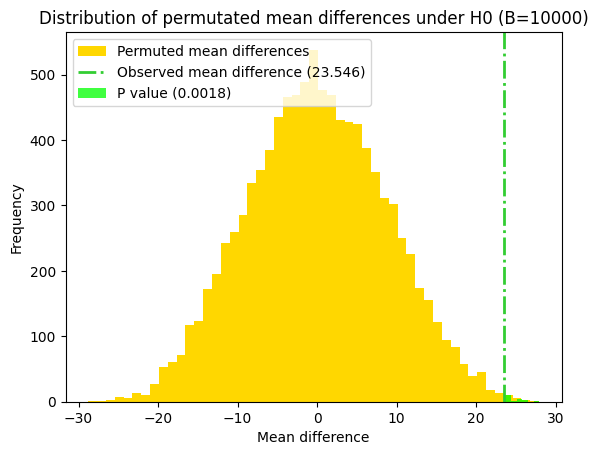

In [46]:
# Plot the histogram of the shuffled mean differences
plt.hist(
    bs_mean_diff_shuffled,
    density=False,
    bins='auto',
    color='gold',
    # alpha=0.75,
    label='Permuted mean differences')

# Annotate the observed mean difference
plt.axvline(
    x=mean_diff, # type: ignore
    color='limegreen',
    linestyle='-.', lw=2,
    label=f'Observed mean difference ({mean_diff:.3f})')

# Plot the histogram of the mean differences greater than or equal to the observed mean difference
plt.hist(
    bs_mean_diff_shuffled[bs_mean_diff_shuffled >= mean_diff],
    density=False,
    bins='auto',
    color='lime',
    alpha=0.75,
    label=f'P value ({p_value_permutation:.4f})')

# Add labels and title
plt.xlabel('Mean difference')
plt.ylabel('Frequency')
plt.title(f"Distribution of permutated mean differences under H0 (B={n_replicates})")
plt.legend();

All the P values are considerably smaller than the typical significance level of 0.05. This indicates strong evidence to **reject the null hypothesis** of no difference between the means of the "old" and "young" rat groups. Therefore, we can confidently conclude that there is a **statistically significant difference** between the means of the two groups. The data suggests that the "young" rats, on average, have a significantly different (likely higher, based on the previous context) outcome measurement compared to the "old" rats.

Note that the slightly smaller P values from the permutation test and bootstrapping might indicate that these non-parametric methods are slightly more sensitive in detecting the difference in means for this particular dataset. However, the overall conclusion remains the same across all tests.

## Conclusion

In this chapter, we explored the **unpaired t-test**, a fundamental statistical tool for comparing the means of two independent groups. We started by emphasizing the importance of *descriptive statistics and visualization* in understanding the characteristics of the data before proceeding with hypothesis testing. We then delved into the assumptions underlying the t-test, particularly **normality** and **equal variances**, and discussed how to assess and address potential violations of these assumptions.

We examined both the **Welch's t-test** (for unequal variances), and standard **Student t-test** (assuming equal variances), highlighting their formulas, calculations, and interpretations. We also demonstrated how to perform these tests in Python using both the `scipy.stats`, `pingouin` and `statsmodels` libraries.

Furthermore, we explored the power of **bootstrapping** and **permutation** tests as *non-parametric alternatives* or complements to the traditional t-test. We illustrated how these resampling-based methods can be used to estimate P values and confidence intervals, providing valuable insights even when the underlying assumptions of the t-test might not be fully met.

Finally, we used the `penguins` dataset to demonstrate the practical application of t-tests and the importance of considering both statistical significance and the visual representation of data. We learned that overlapping distributions do not necessarily imply the absence of a significant difference, especially with small sample sizes.

By mastering the concepts and techniques presented in this chapter, we are now equipped to confidently apply the unpaired t-test in our research and data analysis endeavors, drawing meaningful conclusions about differences between groups and contributing to the advancement of knowledge in the field of life sciences. Remember that the choice between the standard t-test and Welch's t-test should be guided by a careful assessment of the assumptions and the characteristics of the data. Additionally, consider leveraging the flexibility of bootstrapping and permutation tests when dealing with non-normal data or small sample sizes.

## Cheat sheet

### Descriptive statistics and visualization

```python
import scipy.stats as stats
# Descriptive statistics
stats.describe(data1)

import matplotlib.pyplot as plt
import seaborn as sns
# Box and swarm plots
sns.boxplot(data=[data1, data2])
sns.swarmplot(data=[data1, data2])
```

### Assessing assumptions

#### Normality testing

```python
# Using scipy.stats
# D'Agostino-Pearson K² test
stats.normaltest(data1)
# Shapiro-Wilk
stats.shapiro(data1)

# Using pingouin
import pingouin as pg
pg.normality(data1, method='normaltest')
pg.normality(data1, method='shapiro')

# Q-Q plot
pg.qqplot(data1, dist='norm', confidence=0.95)
```

#### Homoscedasticity testing

```python
# Levene's test for equal variances
stats.levene(data1, data2)
# Bartlett's test for equal variances
stats.bartlett(data1, data2)

# Using pingouin
pg.homoscedasticity([data1, data2], method='levene')
pg.homoscedasticity([data1, data2], method='bartlett')

# Homoscedasticity testing with DataFrame
pg.homoscedasticity(
    data=data,
    dv=dv,
    group=group,
    method='levene')
```

### T-test

#### Welch's t-test

```python
# Using scipy.stats
stats.ttest_ind(data1, data2, equal_var=False)

# Using Pingouin
pg.ttest(data1, data2, correction=True)
```

#### Student's t-test

```python
# Using scipy.stats
stats.ttest_ind(data1, data2, equal_var=True)
# One-sided t-test
stats.ttest_ind(x - 3,
    y,
    equal_var=True,
    alternative='greater',
    nan_policy='omit',  # scipy doesn't remove missing values automatically
)

# Using Pingouin
pg.ttest(data1, data2, correction=False)
# T-test with a DataFrame
pg.ttest(
    x=x,  # the method removes missing values by default
    y=y,
    correction=False)
# One-sided t-test
pg.ttest(
    x=x - 3,
    y=y,
    correction=False,
    alternative='greater')

# Using statsmodels API
import statsmodels.api as sm
sm.stats.ttest_ind(
    x1=x,
    # statsmodels doesn't support policy for missing values
    x2=y,
    usevar='pooled',       # Specify equal variances assumption
    alternative='larger',  # Test if the Adelie bill depth mean (x1) is larger
    value=3                # difference between the means (x1 - x2) under the null hypothesis
)
```

### Bootstrapping and permutation tests

#### Bootstrapping

```python
# Generate 10,000 bootstrap replicates of the mean for each group
# !Make sure to choose exactly N elements randomly **with replacement**
n_replicates = 10000
bs_old_means = np.array(
    [np.mean(
        np.random.choice(
            data1,
            size=len(data1),
            replace=True
        )) for _ in range(n_replicates)
    ])

# Calculate the statistic of interest `bs` for each replicate
```

##### Confidence interval

```python
bs_CI = np.round(np.percentile(bs, [2.5, 97.5]), 2)
```

##### Bootstrapping with pingouin

```python
bs_ci, bt = pg.compute_bootci(
    x=data1,
    y=data2,
    func=lambda x,y : np.mean(data1) -np.mean(data2),
    confidence=0.95,
    method='cper',  # Bias-corrected percentile method (default)
    seed=111,
    decimals=3,
    n_boot=10000,
    return_dist=True,)
```

#### P value

##### Bootstrapped t-statistics of shifted data

```python
n_replicates = 10000

# Calculate the combined mean of both groups
combined_mean = np.mean(np.concatenate([data1, data2]))

# Shift the data in each group to have the same mean (combined_mean)
data1_shifted = data1 - np.mean(data1) + combined_mean
data2_shifted = data2 - np.mean(data2) + combined_mean

# Generate 10,000 bootstrap replicates for each shifted group
bs_shifted_data1 = np.array([np.random.choice(data1_shifted, size=len(data1), replace=True) for _ in range(n_replicates)])
bs_shifted_data2 = np.array([np.random.choice(data2_shifted, size=len(data2), replace=True) for _ in range(n_replicates)])

# Calculate sample means and variances for each bootstrap replicate
# !np.mean calculates the mean of the entire flattened array by default if no 'axis' is provided
bs_shifted_data1_means = np.mean(bs_shifted_data1, axis=1)  # Calculate mean along each row (replicate)
bs_shifted_data2_means = np.mean(bs_shifted_data2, axis=1)

bs_shifted_data1_vars = np.var(bs_shifted_data1, ddof=1, axis=1)  # Calculate variance along each row
bs_shifted_data2_vars = np.var(bs_shifted_data2, ddof=1, axis=1)

# Calculate the standard error for the difference in means for each replicate (assuming unequal variances)
bs_se_unequal = np.sqrt(bs_shifted_data1_vars / len(data1) + bs_shifted_data2_vars / len(data2))

# Calculate Welch's t-statistic for each bootstrap replicate
bs_t_statistic_welch = (bs_shifted_data2_means - bs_shifted_data1_means) / bs_se_unequal

# Calculate the P value using bootstrapping (one-tailed test, assuming unequal variances)
p_value_bs_shifted = np.sum(bs_t_statistic_welch >= t_statistic_welch) / len(bs_t_statistic_welch)
```
##### Permutation


```python
def permutation_sample(data1, data2):
    # Combine the two datasets into a single array
    combined_data = np.concatenate([data1, data2])
    # Shuffle the combined data in-place
    np.random.shuffle(combined_data)
    # Split the shuffled data back into two arrays with original sizes
    permuted_data1 = combined_data[:len(data1)]
    permuted_data2 = combined_data[len(data1):]

    return permuted_data1, permuted_data2

bs_mean_diff_shuffled = np.array([np.mean(x) - np.mean(y) for _ in range(n_replicates) for x, y in [permutation_sample(data1, data2)]])

p_value_permutation = np.sum(bs_mean_diff_shuffled >= mean_diff) / len(bs_mean_diff_shuffled)
```

## Session Information

The output below details all packages and version necessary to reproduce the results in this report.

In [47]:
!python --version
print("-------------")
# List of packages we want to check the version
packages = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scipy', 'pingouin', 'statsmodels']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    # Get the version of the package
    output = !pip show {package} | findstr "Version"
    # If the output is not empty, get the version
    if output:
        version = output[0].split()[-1]
    else:
        version = 'Not installed'
    # Append the version to the list
    versions.append(version)

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.6
-------------
numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.9.2
seaborn: 0.13.2
scipy: 1.14.1
pingouin: 0.5.5
statsmodels: 0.14.2
